In [2]:
#import different libary's needed

import praw
import pandas as pd
import time

In [3]:
#login api reddit client

CLIENT_ID = "iL1WH1iZl3Q9eg"
CLIENT_SECRET = "av33tHFK7E059VrVLWYGgzv_OB0"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/mainmancudi)"

In [4]:
#import api

api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)
api.read_only

True

In [5]:
#get 500 top submissions from chosen subreddit and get items in list
list_empty = []
for submission in api.subreddit('leagueoflegends').hot(limit=500):
    item = {
        "score" : submission.score,
        "num_comments" : submission.num_comments,
        "title" : submission.title,
        "author_name" : submission.author,
        "time" : time.ctime(submission.created_utc),
        "id" : submission.id

    }
    list_empty.append(item)

In [6]:
#make the panda dataframe and show the first 5 items

df = pd.DataFrame(list_empty)
df.head()

,author_name,id,num_comments,score,time,title
0,AutoModerator,9u9p75,24,21,Mon Nov 5 03:33:18 2018,Monday Megathread! Ask questions and share kno...
1,sarahbotts,9tuvnv,6,112,Sat Nov 3 16:16:36 2018,Our 24-hour Extra Life stream featuring Mods v...
2,timeistemporary,9ub8k1,262,1125,Mon Nov 5 07:26:13 2018,"MikeYeung leaving TSM, leaves farewell note on..."
3,topkeklul,9u8u4p,937,2232,Mon Nov 5 01:37:14 2018,Coach of UOL about Youngbuck
4,burizar,9u6nbl,1518,5835,Sun Nov 4 21:11:59 2018,"G2 Wunder: ""I think that FNC reached their goa..."


In [7]:
#read out top authors

df2 = df["author_name"].value_counts().head(10)
df2

corylulu        5
SairesArt       3
lollideath      3
Dominicu104     3
bbjimin         3
sarahbotts      3
SummonerJoey    3
sr_united_sr    3
02949685968     2
Vulkanodox      2
Name: author_name, dtype: int64

In [8]:
#plotting the score en comments hist

df.plot(y = ["score", "num_comments"], kind = "hist", bins = 10)

In [9]:
#splitting the time in hours and getting the hours in a list

time = pd.Series(df.time)
split_time = time.str.split(" ")
day_time = []
index = 0
for day in split_time:
    hour = day[3].split(":")
    hour = hour[0]
    day_time.append(int(hour))
    index = index + 1
df3 = pd.DataFrame(day_time)


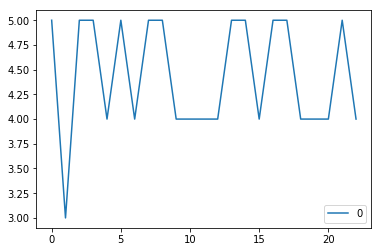

In [10]:
#plotting the time graph

df3.head(23).plot()

In [18]:
#find submission with highest amount of comments and convert id to readable string

comments_high = df.sort_values("num_comments", ascending = False).head(1)
comments_high = comments_high["id"]
comments_high = str(comments_high)
comments_high = comments_high[7:13]
comments_high

'9tszu7'

In [19]:
#scrape submission for comments and putting it in a dataframe

submission = api.submission(id = comments_high)
comments_list = []
for comment in submission.comments:
    if isinstance(comment, praw.models.MoreComments):
        continue
    comments_list.append({
                   "body" : comment.body[0:100],
                   "score" : comment.score,
                   "author" : str(comment.author)
               })
df4 = pd.DataFrame(comments_list)

In [20]:
#showing first 5 items from new dataframe

df4.head()

,author,body,score
0,PuppiesbyPound,[Game 1 IG 1-0 FNC](https://www.reddit.com/r/l...,1
1,mybankpin,Rookie with the jebait. Riot brings in a Korea...,2205
2,Gaelenmyr,"im disappointed because they were outclassed, ...",5275
3,GambitTheBest,Duke quietly getting another world championshi...,1389
4,Gumisiek,"Bwipo: ""Honestly, watching this Worlds, I feel...",3227


In [21]:
#making a new dataframe based on the combined scores by author

df5 = df4.groupby("author")["score"].sum()
df5 = df5.sort_values(ascending = False)
df5.head()

author
NetSraC1306       6401
Gaelenmyr         5275
da808pc           4769
Fire_Lord_Zuko    4206
dumbocow          3951
Name: score, dtype: int64

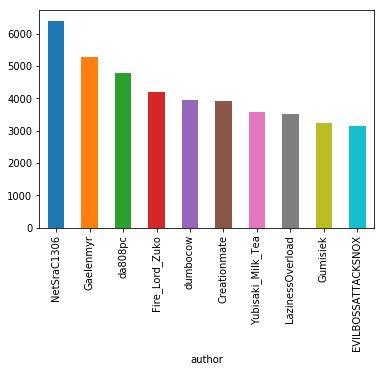

In [22]:
#plotting the new dataframe

df5[0:10].plot(kind = "bar")